# Supply Chain Optimization : SIKA CASE STUDY

# 1. Problem Statement - 




The supply chain network includes:
- **8 markets** in Country 1, Country 2, Country 3, Country 4, Country 5, Country 6, Country 7 and Country 8
- SIKA has open factories in only **6 markets**: Country 1, Country 2, Country 3, Country 4, Country 5, Country 6

To design the supply chain network, we need to consider

- Fixed production costs of the facilities ($/Quarter)

- Landed Cost (= Production + Transport + Import Tax) $ per Ton

- Customer's demand (Tons/Quarter)

- Lead time max = 30 days



## The objective

Our aim is to determine which **plant to operate** and under **which capacity level** and **which plant is supplying each market**

We are going to test the following scenarios

- Scenario 1: has at least 700 tons of spare capacity to accommodate future growth in demand
- Scenario 2: can satisfy a shorter lead time, which we think will be required by more of our customers


# 2. Importing & loading data

<div class="alert alert-block alert-info">
Exercise : Load and save the supply chain network into the appropriate form 

In [1]:
## define the structure of the network
markets = ['Country 1', 'Country 2', 'Country 3', 'Country 4', 'Country 5', 'Country 6', 'Country 7', 'Country 8']

## define the plant locations
plants = ['Country 1', 'Country 2', 'Country 3', 'Country 4', 'Country 5', 'Country 6']

<div class="alert alert-block alert-info">
Exercise :Load the fixed costs for each country

In [2]:
## load thequarterly production fixed costs for each country

prod_fixed_costs_list = [1380000, 1050000, 3171600, 618240, 1785000, 1633800]

prod_fixed_costs = {
        'Country 1': 1380000,
        'Country 2': 1050000,
        'Country 3': 3171600,
        'Country 4': 618240,
        'Country 5': 1785000,
        'Country 6': 1633800
}

<div class="alert alert-block alert-info">
Exercise : Load the landed costs

In [3]:
## Landed Cost (= Production + Transport + Import Tax) $ per Ton
landed_costs = [#markets
                # C1,   C2,   C3,   C4,   C5,   C6,   C7,   C8
                [4840, 4900, 5484, 5501, 5182, 5050, 5152, 5172], #C1
                [5250, 5180, 5838, 5872, 5415, 5350, 5509, 5519], #C2
                [5030, 5508, 4880, 5626, 5236, 5080, 5030, 5314], #C3
                [5020, 5504, 5594, 4940, 5198, 5140, 5020, 5297], #C4
                [5191, 5708, 5788, 5830, 5071, 5311, 5211, 5425], #C5
                [5423, 5655, 5775, 5776, 5463, 5050, 5170, 5493]] #C6



<div class="alert alert-block alert-info">
Lead time matrix

In [4]:
## Lead time matrix
Lead_time_matrix = [#markets
                # C1, C2, C3, C4, C5, C6, C7, C8
                [7, 18, 24, 14, 31, 31, 14, 39], #C1
                [12, 7, 15, 12, 25, 20, 12, 25], #C2
                [16, 15, 7, 16, 27, 25, 16, 29], #C3
                [18, 20, 27, 7, 31, 21, 21, 33], #C4
                [31, 38, 38, 38, 7, 38, 38, 24], #C5
                [36, 40, 33, 32, 44, 7, 40, 49]] #C6



In [5]:
max(Lead_time_matrix)

[36, 40, 33, 32, 44, 7, 40, 49]

In [6]:
maximum = max(max(row) for row in Lead_time_matrix)
maximum

49

<div class="alert alert-block alert-info">
Manufacturing capacity

In [7]:
## load manufacturing capacity by site
manufacturing_capacity = {
        'Country 1': 1725,
        'Country 2': 800,
        'Country 3': 5286,
        'Country 4': 483,
        'Country 5': 1050,
        'Country 6': 2334
}

<div class="alert alert-block alert-info">
Exercise : Import the customers' demand

In [8]:
## load customers' demand in Tons per market

demand_markets = {#market : demand
                  'Country 1': 1120,
                  'Country 2': 425,
                  'Country 3': 3225,
                  'Country 4': 292,
                  'Country 5': 684,
                  'Country 6': 2065,
                  'Country 7': 247,
                  'Country 8': 180
}

# 3. Data analysis

<div class="alert alert-block alert-info">
Exercise : Compute the total demand 

In [9]:
## checking the total demand
total_demand = 0
demand = []
for key in demand_markets.keys():
    total_demand += demand_markets[key]
    demand.append(demand_markets[key])
    
    
## print out the total demand
print(f'total demand {total_demand} units/month from {len(demand_markets.keys())} markets')

total demand 8238 units/month from 8 markets


In [10]:
demand

[1120, 425, 3225, 292, 684, 2065, 247, 180]

<div class="alert alert-block alert-info">
Exercise : Draw the demand markets on pie chart

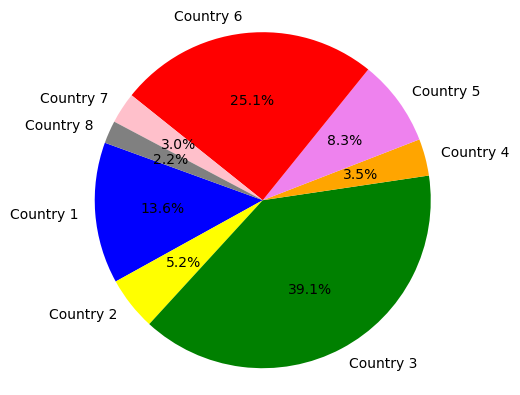

In [11]:
import matplotlib.pyplot as plt
import numpy as np

colors=['blue', 'yellow', 'green', 'orange', 'violet', 'red', 'pink', 'grey']

#sizes= [1500, 600, 500, 300]

plt.pie(demand, labels=markets, colors=colors, startangle=160, autopct='%1.1f%%')

plt.axis('equal')

plt.show()

<div class="alert alert-block alert-info">
Exercise : Draw the manufacturing sites capacity on bar chart and compare it to the markets' demand

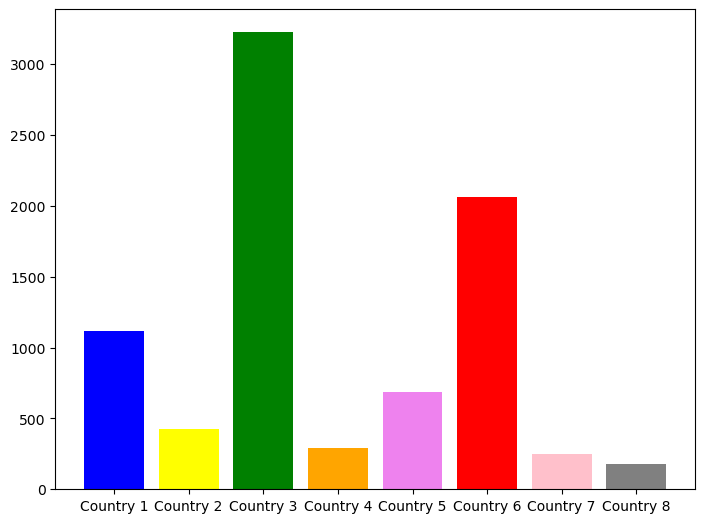

In [12]:
colors=['blue', 'yellow', 'green', 'orange', 'violet', 'red', 'pink', 'grey']

fig = plt.figure()
ax = fig.add_axes([0,0, 1, 1])
country = demand_markets.keys()
market_demand = demand_markets.values()
ax.bar(country, market_demand, color=colors)
plt.show()

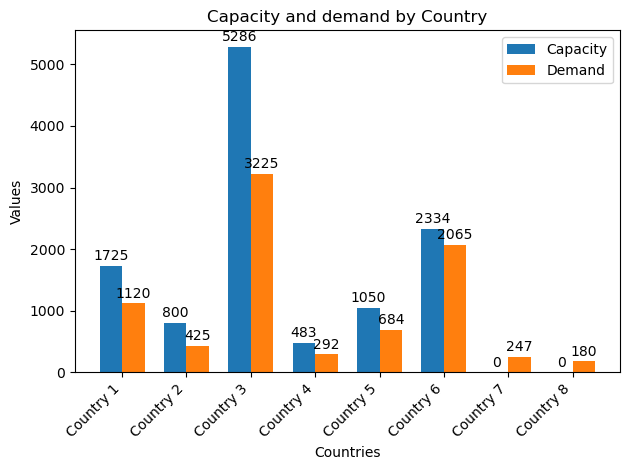

In [13]:
import matplotlib.pyplot as plt

markets = markets
plants = plants
capacity = [manufacturing_capacity[country] for country in plants]+[0,0]
demand_per_country = [demand_markets[country] for country in markets]

bar_width = 0.35
index = range(len(markets))

fig, ax = plt.subplots()
bar1 = ax.bar(index, capacity, bar_width, label='Capacity')
bar2 = ax.bar([i + bar_width for i in index], demand_per_country, bar_width, label='Demand')

ax.bar_label(bar1, padding=2)
ax.bar_label(bar2, padding=2)

ax.set_xlabel('Countries')
ax.set_ylabel('Values')
ax.set_title('Capacity and demand by Country')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(markets, rotation=45, ha='right')
ax.legend()

plt.tight_layout() 
plt.show()


<div class="alert alert-block alert-info">
Exercise : Draw the fixed costs manufacturing sites on bar chart

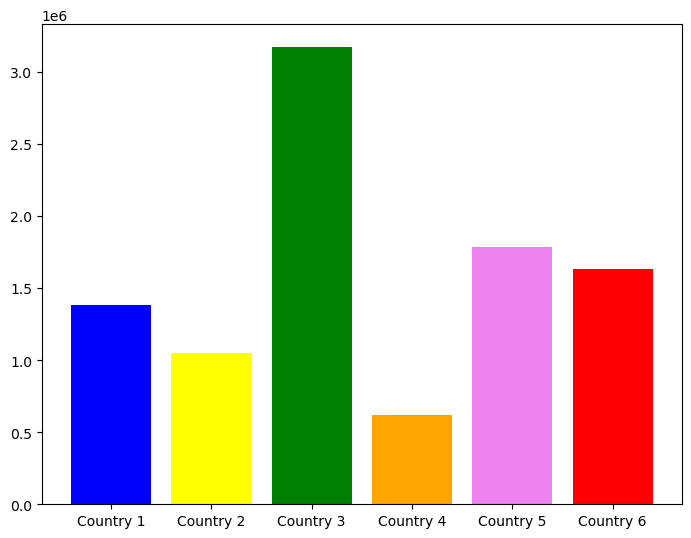

In [14]:
colors=['blue', 'yellow', 'green', 'orange', 'violet', 'red', 'pink', 'grey']

fig = plt.figure()
ax = fig.add_axes([0,0, 1, 1])
country = prod_fixed_costs.keys()
fixed = prod_fixed_costs_list
ax.bar(country, fixed, color=colors)
plt.show()

<div class="alert alert-block alert-info">
Exercise : Draw the variable production costs for each country on bar chart

C:\Users\romai\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


<Axes: >

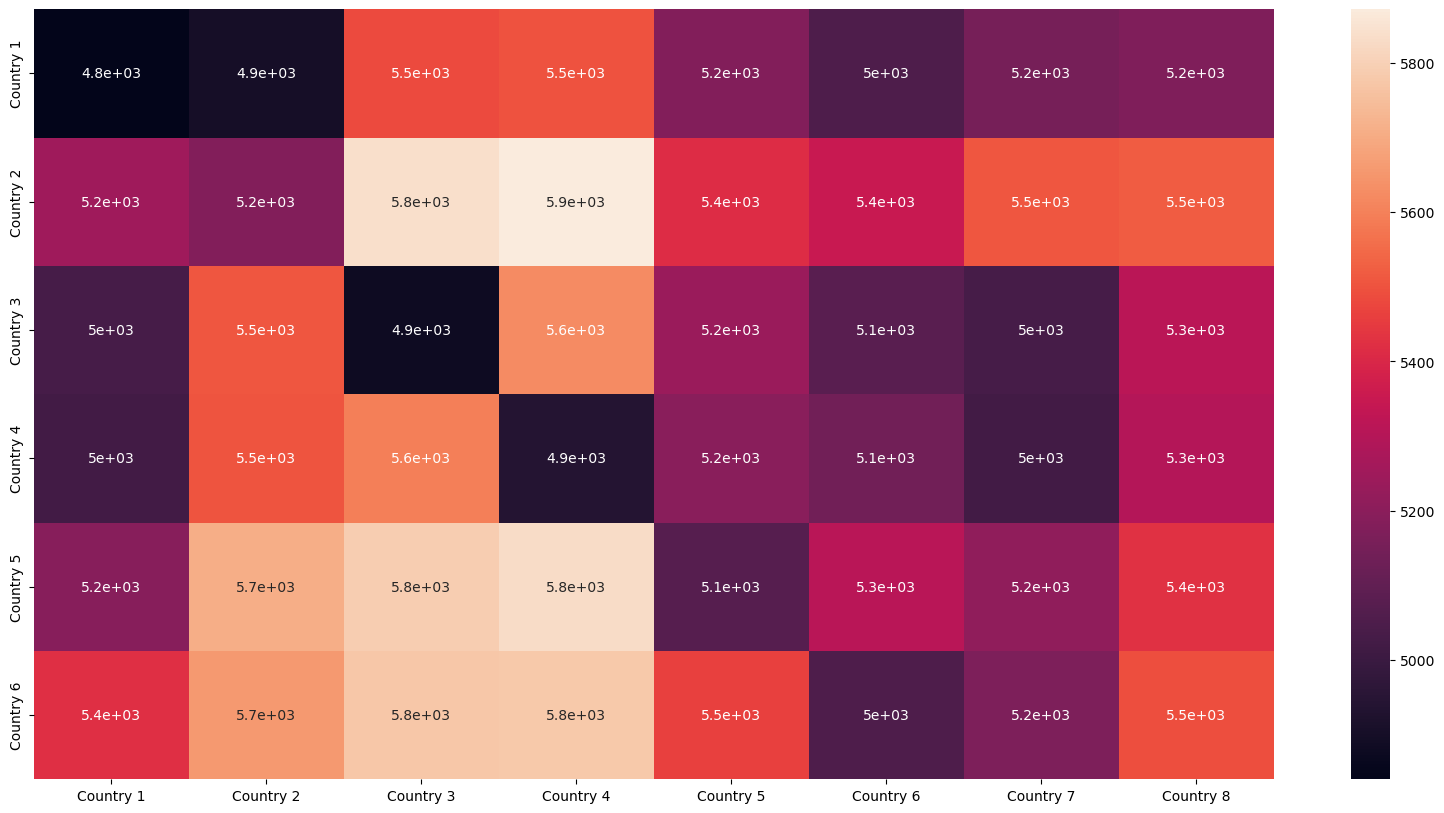

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(landed_costs, annot=True, xticklabels=markets, yticklabels=plants)

<div class="alert alert-block alert-info">
Exercise : Draw the lead time

<Axes: >

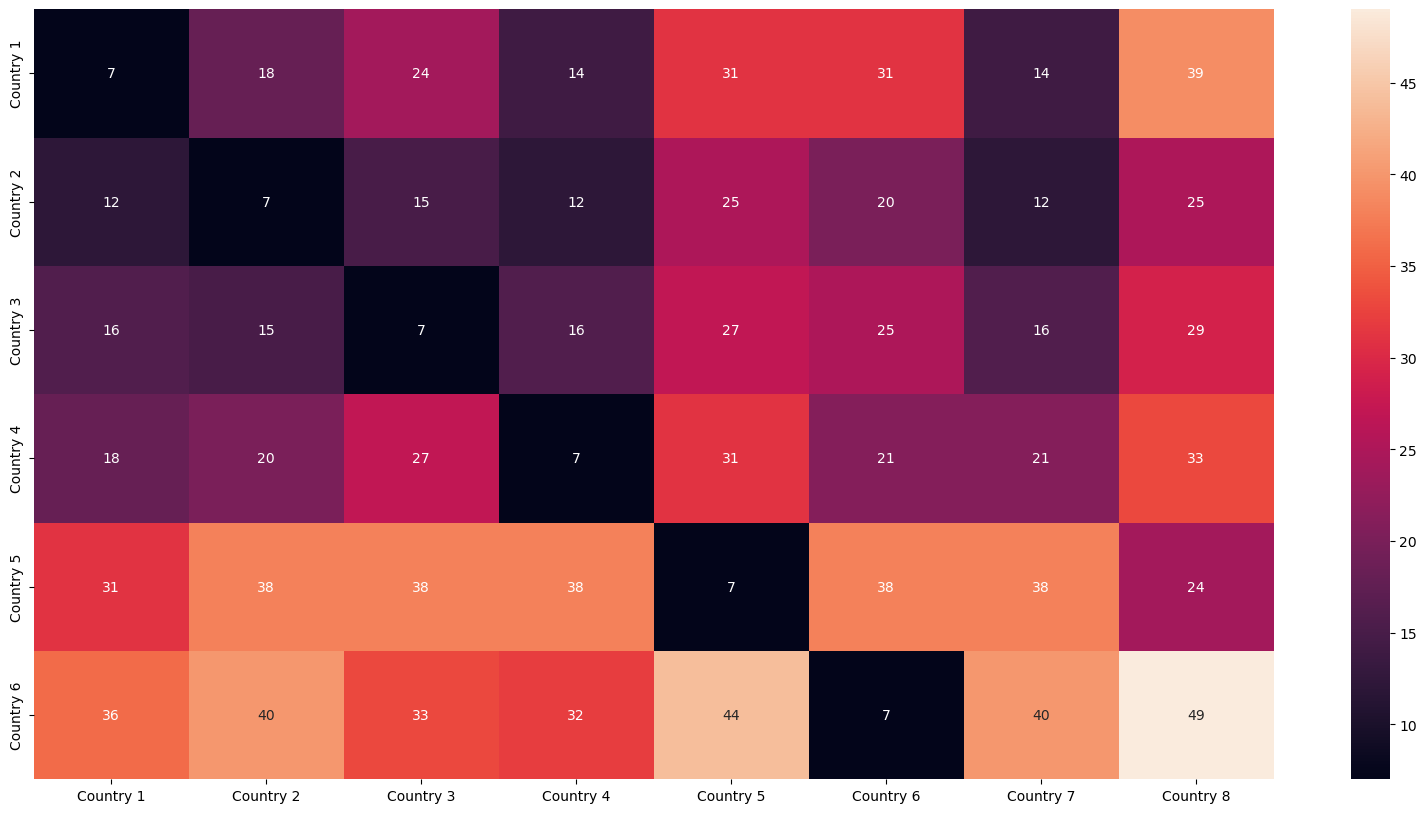

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.color_palette("coolwarm", as_cmap=True)
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(Lead_time_matrix, annot=True, xticklabels=markets, yticklabels=plants)

# 4. Optimization -- Build the model

In [17]:
# Import gurobi modeler functions
from gurobipy import *

<div class="alert alert-block alert-info">
Exercise : Create a 'model' variable and define your decision variables

In [18]:
# Creates the 'prob' variable to contain the problem data
prob = Model("SC_Problem")


#the decision manufacturing site location (which route do we use)
locationVar = prob.addVars(plants, markets, vtype=GRB.BINARY, name='unique_route')

# to avoid double sum of fonctionning plant fixed cost
uniqueVar = prob.addVars(plants, vtype=GRB.BINARY, name='unique_plant')

# the decision variables are created plant->market
allocationVar = prob.addVars(plants, markets, vtype=GRB.CONTINUOUS,
                                                                     name='allocation')


Restricted license - for non-production use only - expires 2025-11-24


<div class="alert alert-block alert-info">
Exercise : Define the possible route given the shipping time

In [19]:
# routes that respect the maximum delay autorized
prob.addConstrs(((locationVar[plant_id, market_id] * Lead_time_matrix[plants.index(plant_id)][markets.index(market_id)]
                 <= 30)
                 for market_id in markets
                 for plant_id in plants), name='route_inf_30') 


{('Country 1', 'Country 1'): <gurobi.Constr *Awaiting Model Update*>,
 ('Country 1', 'Country 2'): <gurobi.Constr *Awaiting Model Update*>,
 ('Country 1', 'Country 3'): <gurobi.Constr *Awaiting Model Update*>,
 ('Country 1', 'Country 4'): <gurobi.Constr *Awaiting Model Update*>,
 ('Country 1', 'Country 5'): <gurobi.Constr *Awaiting Model Update*>,
 ('Country 1', 'Country 6'): <gurobi.Constr *Awaiting Model Update*>,
 ('Country 2', 'Country 1'): <gurobi.Constr *Awaiting Model Update*>,
 ('Country 2', 'Country 2'): <gurobi.Constr *Awaiting Model Update*>,
 ('Country 2', 'Country 3'): <gurobi.Constr *Awaiting Model Update*>,
 ('Country 2', 'Country 4'): <gurobi.Constr *Awaiting Model Update*>,
 ('Country 2', 'Country 5'): <gurobi.Constr *Awaiting Model Update*>,
 ('Country 2', 'Country 6'): <gurobi.Constr *Awaiting Model Update*>,
 ('Country 3', 'Country 1'): <gurobi.Constr *Awaiting Model Update*>,
 ('Country 3', 'Country 2'): <gurobi.Constr *Awaiting Model Update*>,
 ('Country 3', 'Coun

In [20]:
# add constr maxaux = max(0, aux)
for plant_id in plants:
    prob.addGenConstrMax(uniqueVar[plant_id],[locationVar[plant_id, market_id] for market_id in markets],0.0,name="maxconstr")

<div class="alert alert-block alert-info">
Exercise : Define the capacity restriction capacity on production site

In [21]:
# the supply maximum constraints are added to prob for each plant
prob.addConstrs((quicksum(allocationVar[plant_id, market_id] for market_id in markets) 
                 <= manufacturing_capacity[plant_id] for plant_id in plants), name='capacityLimit') 


{'Country 1': <gurobi.Constr *Awaiting Model Update*>,
 'Country 2': <gurobi.Constr *Awaiting Model Update*>,
 'Country 3': <gurobi.Constr *Awaiting Model Update*>,
 'Country 4': <gurobi.Constr *Awaiting Model Update*>,
 'Country 5': <gurobi.Constr *Awaiting Model Update*>,
 'Country 6': <gurobi.Constr *Awaiting Model Update*>}

<div class="alert alert-block alert-info">
Constraint : Define the covering demand constraint

In [22]:
# the market demand covering constraints are added to prob for each market
prob.addConstrs((quicksum(allocationVar[plant_id, market_id]
                          *locationVar[plant_id, market_id]
                          for plant_id in plants
                         ) 
                 == demand_markets[market_id]
                 #for plant_id in plants 
                 for market_id in markets), name='demand_covering')


{'Country 1': <gurobi.QConstr Not Yet Added>,
 'Country 2': <gurobi.QConstr Not Yet Added>,
 'Country 3': <gurobi.QConstr Not Yet Added>,
 'Country 4': <gurobi.QConstr Not Yet Added>,
 'Country 5': <gurobi.QConstr Not Yet Added>,
 'Country 6': <gurobi.QConstr Not Yet Added>,
 'Country 7': <gurobi.QConstr Not Yet Added>,
 'Country 8': <gurobi.QConstr Not Yet Added>}

<div class="alert alert-block alert-info">
Constraint : +700 spare capacity

In [23]:
# +700 spare capacity
prob.addConstr(((quicksum(manufacturing_capacity[plant_id] * uniqueVar[plant_id]
                              for plant_id in plants)
                              -
                              quicksum(allocationVar[plant_id, market_id]
                              for plant_id in plants
                              for market_id in markets)
                    )
                    >= 700), name='spare_capacity')

<gurobi.Constr *Awaiting Model Update*>

<div class="alert alert-block alert-info">
Exercise : Define the problem objective function, consider expression from gurobi

In [24]:
## compute total fixed cost expression
total_fixed_cost = quicksum(
                            uniqueVar[plant_id] 
                            * prod_fixed_costs[plant_id]
                            for plant_id in plants
                            )

## compute total variable cost expression
total_prod_variable = quicksum(allocationVar[plant_id, market_id] 
                               * landed_costs[plants.index(plant_id)][markets.index(market_id)] 
                               for plant_id in plants for market_id in markets)

## compute the total objective 
total_objective = total_fixed_cost + total_prod_variable

# The objective function is added to prob first

prob.setObjective(total_objective, GRB.MINIMIZE)

In [25]:
# The problem data is written to an .lp file
prob.write('SCModel.lp')

In [26]:
# The problem is solved using gurobi's choice of Solver
prob.optimize()

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 55 rows, 102 columns and 150 nonzeros
Model fingerprint: 0x5b55c6b7
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 continuous, 54 integer (54 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e+03, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+01, 5e+03]
  QRHS range       [2e+02, 3e+03]
Presolve removed 24 rows and 39 columns
Presolve time: 0.00s
Presolved: 111 rows, 122 columns, 334 nonzeros
Presolved model has 30 SOS constraint(s)
Variable types: 74 continuous, 48 integer (48 binary)
Found heuristic solution: objective 4.936625e+07

Root relaxation: objective 4.725560e+07, 6 iterations, 0.00 s

<div class="alert alert-block alert-info">
Exercise : Print out the results

In [27]:
for v in prob.getVars():
    print(f"{v.VarName} = {v.X}")

unique_route[Country 1,Country 1] = 1.0
unique_route[Country 1,Country 2] = 1.0
unique_route[Country 1,Country 3] = 1.0
unique_route[Country 1,Country 4] = 1.0
unique_route[Country 1,Country 5] = 0.0
unique_route[Country 1,Country 6] = 0.0
unique_route[Country 1,Country 7] = 1.0
unique_route[Country 1,Country 8] = 0.0
unique_route[Country 2,Country 1] = 0.0
unique_route[Country 2,Country 2] = 0.0
unique_route[Country 2,Country 3] = 0.0
unique_route[Country 2,Country 4] = 0.0
unique_route[Country 2,Country 5] = 0.0
unique_route[Country 2,Country 6] = 0.0
unique_route[Country 2,Country 7] = 0.0
unique_route[Country 2,Country 8] = 0.0
unique_route[Country 3,Country 1] = 1.0
unique_route[Country 3,Country 2] = 1.0
unique_route[Country 3,Country 3] = 1.0
unique_route[Country 3,Country 4] = 1.0
unique_route[Country 3,Country 5] = 1.0
unique_route[Country 3,Country 6] = 1.0
unique_route[Country 3,Country 7] = 1.0
unique_route[Country 3,Country 8] = 1.0
unique_route[Country 4,Country 1] = 0.0


In [28]:
## print the objective value
print('total objective ', prob.objVal)

# print objective component cost
print(' fixed costs ', total_fixed_cost.getValue())

total objective  47255595.999999896
 fixed costs  6185400.0


# 5. Optimization -- Solution

In [29]:
# print the solution
for v in plants:
    if uniqueVar[v].x >0.5:
        print(v, ' : ' , uniqueVar[v].x )

        import pandas as pd
first_routes_df = pd.DataFrame(0, index=plants, columns=markets)
            
for plant_id in plants:
    for market_id in markets:
        if allocationVar[plant_id, market_id].X !=0:
            print('plant ', plant_id, ' to ', market_id, ' ' , allocationVar[plant_id, market_id].X )
            first_routes_df.loc[plant_id,market_id]=allocationVar[plant_id, market_id].X

first_routes_df = first_routes_df.rename(index={'Country 1':"C 1", 'Country 2':"C 2", 'Country 3':"C 3", 'Country 4':"C 4",
                                             'Country 5':"C 5", 'Country 6':"C 6"})
first_routes_df = first_routes_df.rename(columns={'Country 1':"C 1", 'Country 2':"C 2", 'Country 3':"C 3", 'Country 4':"C 4",
                                             'Country 5':"C 5", 'Country 6':"C 6", 'Country 7':"C 7", 'Country 8':"C 8"})
display(first_routes_df)

Country 1  :  1.0
Country 3  :  1.0
Country 6  :  1.0
plant  Country 1  to  Country 1   1120.0
plant  Country 1  to  Country 2   425.0
plant  Country 1  to  Country 4   180.0
plant  Country 3  to  Country 3   3225.0
plant  Country 3  to  Country 4   112.0
plant  Country 3  to  Country 5   684.0
plant  Country 3  to  Country 7   247.0
plant  Country 3  to  Country 8   180.0
plant  Country 6  to  Country 6   2065.0


,C 1,C 2,C 3,C 4,C 5,C 6,C 7,C 8
C 1,1120,425,0,180,0,0,0,0
C 2,0,0,0,0,0,0,0,0
C 3,0,0,3225,112,684,0,247,180
C 4,0,0,0,0,0,0,0,0
C 5,0,0,0,0,0,0,0,0
C 6,0,0,0,0,0,2065,0,0


# 5. Optimization -- Investigate lower lead times and spare capacity requirements

In [30]:
def Optimization_delay_spare(desired_max_delay=30, spare_quantity=700, index_for_dataframe_for_route_details=0):
    
    import pandas as pd
    
    ## define the structure of the network
    markets = ['Country 1', 'Country 2', 'Country 3', 'Country 4', 'Country 5', 'Country 6', 'Country 7', 'Country 8']

    ## define the plant locations
    plants = ['Country 1', 'Country 2', 'Country 3', 'Country 4', 'Country 5', 'Country 6']
    
    ## define empty dataframe for displaying the solution
    routes_df = pd.DataFrame(0, index=plants, columns=markets)
    
    
    
    # Creates the 'prob' variable to contain the problem data
    prob = Model("SC_Problem")


    #the decision manufacturing site location (which route do we use)
    locationVar = prob.addVars(plants, markets, vtype=GRB.BINARY, name='unique_route')

    # to avoid double sum of fonctionning plant fixed cost
    uniqueVar = prob.addVars(plants, vtype=GRB.BINARY, name='unique_plant')

    # the decision variables are created plant->market
    allocationVar = prob.addVars(plants, markets, vtype=GRB.CONTINUOUS,
                                                                         name='allocation')

    # routes that respect the maximum delay autorized
    prob.addConstrs(((locationVar[plant_id, market_id] * Lead_time_matrix[plants.index(plant_id)][markets.index(market_id)]
                     <= desired_max_delay)
                     for market_id in markets
                     for plant_id in plants), name='route_inf_30') 

    # add constr maxaux = max(0, aux)
    for plant_id in plants:
        prob.addGenConstrMax(uniqueVar[plant_id],[locationVar[plant_id, market_id] for market_id in markets],0.0,
                             name="maxconstr")

    # the supply maximum constraints are added to prob for each plant
    prob.addConstrs((quicksum(allocationVar[plant_id, market_id] for market_id in markets) 
                     <= manufacturing_capacity[plant_id] for plant_id in plants), name='capacityLimit') 

    # the market demand covering constraints are added to prob for each market
    prob.addConstrs((quicksum(allocationVar[plant_id, market_id]
                              *locationVar[plant_id, market_id]
                              for plant_id in plants
                             ) 
                     == demand_markets[market_id] 
                     for market_id in markets), name='demand_covering')


    # desired spare capacity
    prob.addConstr(((quicksum(manufacturing_capacity[plant_id] * uniqueVar[plant_id]
                              for plant_id in plants)
                              -
                              quicksum(allocationVar[plant_id, market_id]
                              for plant_id in plants
                              for market_id in markets)
                    )
                    >= spare_quantity), name='spare_capacity')

    ## compute total fixed cost expression
    total_fixed_cost = quicksum(
                                uniqueVar[plant_id] 
                                * prod_fixed_costs[plant_id]
                                for plant_id in plants
                                )

    ## compute total variable cost expression
    total_prod_variable = quicksum(allocationVar[plant_id, market_id] 
                                   * landed_costs[plants.index(plant_id)][markets.index(market_id)] 
                                   for plant_id in plants for market_id in markets)
    
    ## compute the total objective 
    total_objective = total_fixed_cost + total_prod_variable

    # The objective function is added to prob first

    prob.setObjective(total_objective, GRB.MINIMIZE)

    # The problem data is written to an .lp file
    prob.write('SCModel.lp')

    # The problem is solved using gurobi's choice of Solver
    prob.optimize()

    if prob.SolCount >= 1:
        total_costs = prob.objVal
        
        fixed_costs=total_fixed_cost.getValue()
        
        total_landed_costs=total_prod_variable.getValue()

        # print the solution
        operating_plants_list=[]
        plant_to_close_list=[]
        
        for v in plants:
            print(type(v))
            if uniqueVar[v].x >0.5:
                #print(v, ' : ' , uniqueVar[v].x )
                operating_plants_list.append(v)
            else:
                #print(v, ' : ' , uniqueVar[v].x )
                plant_to_close_list.append(v)
        
        for plant_id in plants:
            for market_id in markets:
                if allocationVar[plant_id, market_id].X !=0:
                    #print('plant ', plant_id, ' to ', market_id, ' ' , allocationVar[plant_id, market_id].X )
                    routes_df.loc[plant_id,market_id]=allocationVar[plant_id, market_id].X
        routes_df = routes_df.rename(index={'Country 1':"C 1", 'Country 2':"C 2", 'Country 3':"C 3", 'Country 4':"C 4",
                                             'Country 5':"C 5", 'Country 6':"C 6"})
        routes_df = routes_df.rename(columns={'Country 1':"C 1", 'Country 2':"C 2", 'Country 3':"C 3", 'Country 4':"C 4",
                                             'Country 5':"C 5", 'Country 6':"C 6", 'Country 7':"C 7", 'Country 8':"C 8"})
        
        ## define empty dict for storing results
        solutions_dict = {"lead_time": [desired_max_delay], "spare_quantity":[spare_quantity],
                          "total_cost":[total_costs], "fixed costs":[fixed_costs],
                          "total landed_costs":[total_landed_costs],
                         "nb operating plant":[len(operating_plants_list)], "operating_plants":[operating_plants_list], 
                          "nb plant to close":[len(plant_to_close_list)],"plants_to_close":[plant_to_close_list],
                          "dataframe for details":[index_for_dataframe_for_route_details]
                         }
        
        solutions_df = pd.DataFrame(solutions_dict)
        
        result_text = "success"
    else:
        print("For delay= "+str(desired_max_delay)+" and for spare capacity= "+str(spare_quantity)+": No feasible solution available")
        result_text = "fail"
        solutions_df=None
        routes_df=None

    return solutions_df, routes_df, result_text

In [31]:
total_demand = sum(demand_markets.values())
demand_increase_percent = np.arange(0,101,5)
test_spare_capacity = total_demand*demand_increase_percent/100
test_spare_capacity = np.append(test_spare_capacity, [700, 3439])
test_spare_capacity = np.sort(test_spare_capacity)
test_spare_capacity

array([   0. ,  411.9,  700. ,  823.8, 1235.7, 1647.6, 2059.5, 2471.4,
       2883.3, 3295.2, 3439. , 3707.1, 4119. , 4530.9, 4942.8, 5354.7,
       5766.6, 6178.5, 6590.4, 7002.3, 7414.2, 7826.1, 8238. ])

In [32]:
# Import gurobi modeler functions
from gurobipy import *
import pandas as pd

# define a list for building a list of route detail dataframes
list_of_dataframe_for_route_details=[]
index=0

# define the lead time options we have
test_lead_time_merged_list = [item for sublist in Lead_time_matrix for item in sublist]
test_lead_time_merged_list.append(30)
test_lead_time = sorted(set(test_lead_time_merged_list))

# define the possible prediction for demand increase using x% of actual demand increase +700 (initial problem)
# knowing that 3440= max spare capacity => add 3439 to the list of options
total_demand = sum(demand_markets.values())
demand_increase_percent = np.arange(0,101,5)
test_spare_capacity = total_demand*demand_increase_percent/100
test_spare_capacity = np.append(test_spare_capacity, [700, 3439])
test_spare_capacity = np.sort(test_spare_capacity)

df_temp = pd.DataFrame(columns=["lead_time", "spare_quantity", "total_cost", "fixed costs",
                          "total landed_costs", "nb operating plant", "operating_plants",
                                "nb plant to close", "plants_to_close",
                          "dataframe for details"], index=range(0))

for tld in test_lead_time:
    for tsc in test_spare_capacity:
        print("_________________________________________________________________________________test_"+str(tld)+"_"+str(tsc))
        sol_df, detail_route_df, fail_or_success = Optimization_delay_spare(tld,tsc,index)
        if fail_or_success == "success":
            list_of_dataframe_for_route_details.append(detail_route_df)
            index+=1
            df_temp= pd.concat([df_temp, sol_df], ignore_index=True)



_________________________________________________________________________________test_7_0.0
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 55 rows, 102 columns and 150 nonzeros
Model fingerprint: 0xe32e38aa
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 continuous, 54 integer (54 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e+03, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [7e+00, 5e+03]
  QRHS range       [2e+02, 3e+03]
Presolve removed 48 rows and 6 columns
Presolve time: 0.00s

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 12 available processors)

Solution count 0

Model is infeasible


Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e+03, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [7e+00, 5e+03]
  QRHS range       [2e+02, 3e+03]
Presolve removed 48 rows and 6 columns
Presolve time: 0.00s

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 12 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
For delay= 7 and for spare capacity= 1647.6: No feasible solution available
_________________________________________________________________________________test_7_2059.5
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 55 rows, 102 columns and 150 nonzeros
Model fingerprint: 0x8db3f244
Mod

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 55 rows, 102 columns and 150 nonzeros
Model fingerprint: 0xe8eee88a
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 continuous, 54 integer (54 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e+03, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [7e+00, 5e+03]
  QRHS range       [2e+02, 3e+03]
Presolve removed 48 rows and 6 columns
Presolve time: 0.00s

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 12 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
For delay= 7 and for spare capacity= 3707.1: No feasib

Presolve time: 0.00s

Explored 0 nodes (0 simplex iterations) in 0.00 seconds (0.00 work units)
Thread count was 1 (of 12 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
For delay= 7 and for spare capacity= 5766.6: No feasible solution available
_________________________________________________________________________________test_7_6178.5
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 55 rows, 102 columns and 150 nonzeros
Model fingerprint: 0x5128f843
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 continuous, 54 integer (54 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e+03, 3e+06]
  Bounds range     [1e+0

Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 55 rows, 102 columns and 150 nonzeros
Model fingerprint: 0x97e44c21
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 continuous, 54 integer (54 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e+03, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [7e+00, 8e+03]
  QRHS range       [2e+02, 3e+03]
Presolve removed 47 rows and 6 columns
Presolve time: 0.00s

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 12 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
For delay= 7 and for spare capacity= 8238.0: No feasible solution available
_________________________________________________________________________________test_12_0.0
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win6

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 55 rows, 102 columns and 150 nonzeros
Model fingerprint: 0x0e18890a
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 continuous, 54 integer (54 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e+03, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+01, 5e+03]
  QRHS range       [2e+02, 3e+03]
Presolve removed 43 rows and 5 columns
Presolve time: 0.00s

Explored 0 nodes (0 simplex iterations) in 0.00 seconds (0.00 work units)
Thread count was 1 (of 12 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
For delay= 12 and for spare capacity= 1647.6: No feasi

  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+01, 5e+03]
  QRHS range       [2e+02, 3e+03]
Presolve removed 43 rows and 5 columns
Presolve time: 0.00s

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 12 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
For delay= 12 and for spare capacity= 3439.0: No feasible solution available
_________________________________________________________________________________test_12_3707.1
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 55 rows, 102 columns and 150 nonzeros
Model fingerprint: 0x1a789304
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 continuous, 54 integer (54 binary)
Coeffic

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 55 rows, 102 columns and 150 nonzeros
Model fingerprint: 0xecdf3730
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 continuous, 54 integer (54 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e+03, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+01, 6e+03]
  QRHS range       [2e+02, 3e+03]
Presolve removed 43 rows and 5 columns
Presolve time: 0.00s

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 12 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
For delay= 12 and for spare capacity= 5766.6: No feasi


Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
For delay= 12 and for spare capacity= 7826.1: No feasible solution available
_________________________________________________________________________________test_12_8238.0
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 55 rows, 102 columns and 150 nonzeros
Model fingerprint: 0x65d3c55f
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 continuous, 54 integer (54 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e+03, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+01, 8e+03]
  QRHS range       [2e+02, 3e+03]
Presolve removed 42 rows and 5 columns
Presolve time: 0.00s

Exp

Model fingerprint: 0xa14e9361
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 continuous, 54 integer (54 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e+03, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+01, 5e+03]
  QRHS range       [2e+02, 3e+03]
Presolve removed 39 rows and 4 columns
Presolve time: 0.00s

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 12 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
For delay= 14 and for spare capacity= 1235.7: No feasible solution available
_________________________________________________________________________________test_14_1647.6
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 phys

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 55 rows, 102 columns and 150 nonzeros
Model fingerprint: 0x361faca8
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 continuous, 54 integer (54 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e+03, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+01, 5e+03]
  QRHS range       [2e+02, 3e+03]
Presolve removed 39 rows and 4 columns
Presolve time: 0.00s

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 12 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
For delay= 14 and for spare capacity= 3439.0: No feasi

  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+01, 5e+03]
  QRHS range       [2e+02, 3e+03]
Presolve removed 39 rows and 4 columns
Presolve time: 0.00s

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 12 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
For delay= 14 and for spare capacity= 5354.7: No feasible solution available
_________________________________________________________________________________test_14_5766.6
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 55 rows, 102 columns and 150 nonzeros
Model fingerprint: 0xadb5cb20
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 continuous, 54 integer (54 binary)
Coeffic

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 55 rows, 102 columns and 150 nonzeros
Model fingerprint: 0x39170690
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 continuous, 54 integer (54 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e+03, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+01, 8e+03]
  QRHS range       [2e+02, 3e+03]
Presolve removed 38 rows and 4 columns
Presolve time: 0.00s

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 12 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
For delay= 14 and for spare capacity= 7826.1: No feasi


Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
For delay= 15 and for spare capacity= 823.8: No feasible solution available
_________________________________________________________________________________test_15_1235.7
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 55 rows, 102 columns and 150 nonzeros
Model fingerprint: 0xa97b63b7
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 continuous, 54 integer (54 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e+03, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+01, 5e+03]
  QRHS range       [2e+02, 3e+03]
Presolve removed 35 rows and 3 columns
Presolve time: 0.00s

Expl

Model fingerprint: 0x4a6467de
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 continuous, 54 integer (54 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e+03, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+01, 5e+03]
  QRHS range       [2e+02, 3e+03]
Presolve removed 35 rows and 3 columns
Presolve time: 0.00s

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 12 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
For delay= 15 and for spare capacity= 3295.2: No feasible solution available
_________________________________________________________________________________test_15_3439.0
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 phys

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 55 rows, 102 columns and 150 nonzeros
Model fingerprint: 0x04d59950
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 continuous, 54 integer (54 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e+03, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+01, 5e+03]
  QRHS range       [2e+02, 3e+03]
Presolve removed 35 rows and 3 columns
Presolve time: 0.00s

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 12 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
For delay= 15 and for spare capacity= 5354.7: No feasi

  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+01, 7e+03]
  QRHS range       [2e+02, 3e+03]
Presolve removed 37 rows and 4 columns
Presolve time: 0.00s

Explored 0 nodes (0 simplex iterations) in 0.00 seconds (0.00 work units)
Thread count was 1 (of 12 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
For delay= 15 and for spare capacity= 7414.2: No feasible solution available
_________________________________________________________________________________test_15_7826.1
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 55 rows, 102 columns and 150 nonzeros
Model fingerprint: 0xf1a1afe8
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 continuous, 54 integer (54 binary)
Coeffic

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Optimize a model with 55 rows, 102 columns and 150 nonzeros
Model fingerprint: 0x1cd2b988
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 continuous, 54 integer (54 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e+03, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+01, 5e+03]
  QRHS range       [2e+02, 3e+03]
Presolve removed 26 rows and 2 columns
Presolve time: 0.00s

Explored 0 nodes (0 simplex iterations) in 0.00 seconds (0.00 work units)
Thread count was 1 (of 12 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
For delay= 20 and for spare capacity= 3439.0: No feasible solution available
_________________________________________________________________________________test_20_3707.1
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 55 rows, 102 columns and 150 nonzeros
Model fingerprint: 0x0c7a84b6
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 continuous, 54 integer (54 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e+03, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+01, 6e+03]
  QRHS range       [2e+02, 3e+03]
Presolve removed 26 rows and 2 columns
Presolve time: 0.00s

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 12 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
For delay= 20 and for spare capacity= 5766.6: No feasi

  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+01, 8e+03]
  QRHS range       [2e+02, 3e+03]
Presolve removed 31 rows and 3 columns
Presolve time: 0.00s

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 12 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
For delay= 20 and for spare capacity= 7826.1: No feasible solution available
_________________________________________________________________________________test_20_8238.0
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 55 rows, 102 columns and 150 nonzeros
Model fingerprint: 0xcaf1b461
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 continuous, 54 integer (54 binary)
Coeffic

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 55 rows, 102 columns and 150 nonzeros
Model fingerprint: 0x1a715964
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 continuous, 54 integer (54 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e+03, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+01, 5e+03]
  QRHS range       [2e+02, 3e+03]
Presolve removed 24 rows and 2 columns
Presolve time: 0.00s

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 12 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
For delay= 21 and for spare capacity= 1235.7: No feasi


Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
For delay= 21 and for spare capacity= 3295.2: No feasible solution available
_________________________________________________________________________________test_21_3439.0
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 55 rows, 102 columns and 150 nonzeros
Model fingerprint: 0x0c0a6316
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 continuous, 54 integer (54 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e+03, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+01, 5e+03]
  QRHS range       [2e+02, 3e+03]
Presolve removed 24 rows and 2 columns
Presolve time: 0.00s

Exp

Optimize a model with 55 rows, 102 columns and 150 nonzeros
Model fingerprint: 0x8225479d
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 continuous, 54 integer (54 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e+03, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+01, 5e+03]
  QRHS range       [2e+02, 3e+03]
Presolve removed 24 rows and 2 columns
Presolve time: 0.00s

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 12 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
For delay= 21 and for spare capacity= 5354.7: No feasible solution available
_________________________________________________________________________________test_21_5766.6
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 55 rows, 102 columns and 150 nonzeros
Model fingerprint: 0xb8389fd1
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 continuous, 54 integer (54 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e+03, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+01, 8e+03]
  QRHS range       [2e+02, 3e+03]
Presolve removed 29 rows and 3 columns
Presolve time: 0.00s

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 12 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
For delay= 21 and for spare capacity= 7826.1: No feasi

Model fingerprint: 0x249e6ee9
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 continuous, 54 integer (54 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e+03, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+01, 5e+03]
  QRHS range       [2e+02, 3e+03]
Presolve removed 31 rows and 57 columns
Presolve time: 0.00s
Presolved: 81 rows, 83 columns, 241 nonzeros
Presolved model has 18 SOS constraint(s)
Variable types: 51 continuous, 32 integer (32 binary)
Found heuristic solution: objective 4.938623e+07

Root relaxation: objective 4.847743e+07, 5 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0    4.847743e+07 4.8477e+07  0.00%     -    0s

Explored 1 nodes (5 simplex iterations) in 0.02 seconds (

C:\Users\romai\AppData\Local\Temp\ipykernel_11752\1920307689.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_temp= pd.concat([df_temp, sol_df], ignore_index=True)


Found heuristic solution: objective 4.938623e+07

Root relaxation: objective 4.894772e+07, 7 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0    4.894772e+07 4.8948e+07  0.00%     -    0s

Explored 1 nodes (7 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 12 (of 12 available processors)

Solution count 2: 4.89477e+07 4.93862e+07 

Optimal solution found (tolerance 1.00e-04)
Best objective 4.894771600000e+07, best bound 4.894771600000e+07, gap 0.0000%
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
_________________________________________________________________________________test_24_2059.5
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX

 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0    5.043623e+07 5.0436e+07  0.00%     -    0s

Explored 1 nodes (1 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 12 (of 12 available processors)

Solution count 1: 5.04362e+07 

Optimal solution found (tolerance 1.00e-04)
Best objective 5.043623400000e+07, best bound 5.043623400000e+07, gap 0.0000%
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
_________________________________________________________________________________test_24_3439.0
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 55 rows, 102 columns and 150 nonzeros
Model fingerprint: 0x62ee2aa1
Model has 8 quadratic constraints
Model has 6 gene

Variable types: 48 continuous, 54 integer (54 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e+03, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+01, 5e+03]
  QRHS range       [2e+02, 3e+03]
Presolve removed 32 rows and 57 columns
Presolve time: 0.00s
Presolved: 80 rows, 83 columns, 236 nonzeros
Presolved model has 18 SOS constraint(s)
Variable types: 51 continuous, 32 integer (32 binary)

Explored 1 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 12 (of 12 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
For delay= 24 and for spare capacity= 4942.8: No feasible solution available
_________________________________________________________________________________test_24_5354.7
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instru

  Objective range  [5e+03, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+01, 7e+03]
  QRHS range       [2e+02, 3e+03]
Presolve removed 32 rows and 57 columns
Presolve time: 0.00s
Presolved: 80 rows, 83 columns, 236 nonzeros
Presolved model has 18 SOS constraint(s)
Variable types: 51 continuous, 32 integer (32 binary)

Explored 1 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 12 (of 12 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
For delay= 24 and for spare capacity= 7002.3: No feasible solution available
_________________________________________________________________________________test_24_7414.2
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 55 rows, 102 column

Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 55 rows, 102 columns and 150 nonzeros
Model fingerprint: 0x741f1bc8
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 continuous, 54 integer (54 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e+03, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+01, 5e+03]
  QRHS range       [2e+02, 3e+03]
Presolve removed 25 rows and 45 columns
Presolve time: 0.00s
Presolved: 103 rows, 109 columns, 305 nonzeros
Presolved model has 26 SOS constraint(s)
Variable types: 66 continuous, 43 integer (43 binary)
Found heuristic solution: objective 4.938623e+07

Root relaxation: objective 4.787388e+07, 7 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Nod


*    0     0               0    4.894772e+07 4.8948e+07  0.00%     -    0s

Explored 1 nodes (7 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 12 (of 12 available processors)

Solution count 2: 4.89477e+07 4.93862e+07 

Optimal solution found (tolerance 1.00e-04)
Best objective 4.894771600000e+07, best bound 4.894771600000e+07, gap 0.0000%
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
_________________________________________________________________________________test_25_1647.6
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 55 rows, 102 columns and 150 nonzeros
Model fingerprint: 0x44217cb5
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 continuous, 54 integer (54 bin

Thread count was 12 (of 12 available processors)

Solution count 2: 4.99977e+07 5.04362e+07 

Optimal solution found (tolerance 1.00e-04)
Best objective 4.999771600000e+07, best bound 4.999771600000e+07, gap 0.0000%
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
_________________________________________________________________________________test_25_3295.2
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 55 rows, 102 columns and 150 nonzeros
Model fingerprint: 0xa7bc3c58
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 continuous, 54 integer (54 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e+03, 3e+06]
  Bounds range     [


Optimize a model with 55 rows, 102 columns and 150 nonzeros
Model fingerprint: 0xf785af5a
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 continuous, 54 integer (54 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e+03, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+01, 5e+03]
  QRHS range       [2e+02, 3e+03]
Presolve removed 25 rows and 45 columns
Presolve time: 0.00s
Presolved: 103 rows, 109 columns, 305 nonzeros
Presolved model has 26 SOS constraint(s)
Variable types: 66 continuous, 43 integer (43 binary)

Explored 1 nodes (0 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 12 (of 12 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
For delay= 25 and for spare capacity= 4530.9: No feasible solution available
________________________________________________________________________________

Variable types: 48 continuous, 54 integer (54 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e+03, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+01, 7e+03]
  QRHS range       [2e+02, 3e+03]
Presolve removed 26 rows and 45 columns
Presolve time: 0.00s
Presolved: 102 rows, 109 columns, 299 nonzeros
Presolved model has 26 SOS constraint(s)
Variable types: 66 continuous, 43 integer (43 binary)

Explored 1 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 12 (of 12 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
For delay= 25 and for spare capacity= 6590.4: No feasible solution available
_________________________________________________________________________________test_25_7002.3
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, inst

  Objective range  [5e+03, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+01, 5e+03]
  QRHS range       [2e+02, 3e+03]
Presolve removed 24 rows and 41 columns
Presolve time: 0.00s
Presolved: 109 rows, 117 columns, 326 nonzeros
Presolved model has 28 SOS constraint(s)
Variable types: 71 continuous, 46 integer (46 binary)
Found heuristic solution: objective 4.938623e+07

Root relaxation: objective 4.721836e+07, 10 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 4.7218e+07    0    1 4.9386e+07 4.7218e+07  4.39%     -    0s
H    0     0                    4.849476e+07 4.7218e+07  2.63%     -    0s
H    0     0                    4.734003e+07 4.7218e+07  0.26%     -    0s
     0     0 4.7325e+07    0    3 4.7340e+07 4.7325e+07  0.03%     -    0s
     0     0          -    0      4.7340e+07 4.7336e+07  0.01%     -    

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Variable types: 74 continuous, 48 integer (48 binary)

Root relaxation: objective 5.041625e+07, 1 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0    5.041625e+07 5.0416e+07  0.00%     -    0s

Explored 1 nodes (1 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 12 (of 12 available processors)

Solution count 1: 5.04163e+07 

Optimal solution found (tolerance 1.00e-04)
Best objective 5.041625400000e+07, best bound 5.041625400000e+07, gap 0.0000%
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
_________________________________________________________________________________test_29_3439.0
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thre

Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 55 rows, 102 columns and 150 nonzeros
Model fingerprint: 0x3d37e25e
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 continuous, 54 integer (54 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e+03, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+01, 5e+03]
  QRHS range       [2e+02, 3e+03]
Presolve removed 24 rows and 39 columns
Presolve time: 0.00s
Presolved: 111 rows, 122 columns, 334 nonzeros
Presolved model has 30 SOS constraint(s)
Variable types: 74 continuous, 48 integer (48 binary)

Explored 1 nodes (0 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 12 (of 12 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
For delay= 29 and for spare capacity= 4942.8: No feasible solution available
__

Model fingerprint: 0x62b701da
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 continuous, 54 integer (54 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e+03, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+01, 7e+03]
  QRHS range       [2e+02, 3e+03]
Presolve removed 25 rows and 39 columns
Presolve time: 0.00s
Presolved: 110 rows, 122 columns, 326 nonzeros
Presolved model has 30 SOS constraint(s)
Variable types: 74 continuous, 48 integer (48 binary)

Explored 1 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 12 (of 12 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
For delay= 29 and for spare capacity= 7002.3: No feasible solution available
_________________________________________________________________________________test_29_7414.2
Gurobi Optimizer version 11.0.0 build v11.0.0

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 55 rows, 102 columns and 150 nonzeros
Model fingerprint: 0x421ec5e8
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 continuous, 54 integer (54 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e+03, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+01, 5e+03]
  QRHS range       [2e+02, 3e+03]
Presolve removed 24 rows and 39 columns
Presolve time: 0.00s
Presolved: 111 rows, 122 columns, 334 nonzeros
Presolved model has 30 SOS constraint(s)
Variable types: 74 continuous, 48 integer (48 binary)
Found heuristic solution: objective 4.936625e+07

Root relaxation: objective 4.698044e+07, 8 iterations, 0.00 s

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
_________________________________________________________________________________test_30_1647.6
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 55 rows, 102 columns and 150 nonzeros
Model fingerprint: 0xf0062983
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 continuous, 54 integer (54 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e+03, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+01, 5e+03]
  QRHS range       [2e+02, 3e+03]
Presolve removed 24 rows and 39 columns
Presolve time: 0.00s
Presolved: 111 rows, 122 columns, 334 nonzeros
Presolved model has 30 SOS

Thread count was 12 (of 12 available processors)

Solution count 2: 4.99777e+07 5.04163e+07 

Optimal solution found (tolerance 1.00e-04)
Best objective 4.997773600000e+07, best bound 4.997773600000e+07, gap 0.0000%
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
_________________________________________________________________________________test_30_3295.2
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 55 rows, 102 columns and 150 nonzeros
Model fingerprint: 0x6e8de9a7
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 continuous, 54 integer (54 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e+03, 3e+06]
  Bounds range     [


Optimize a model with 55 rows, 102 columns and 150 nonzeros
Model fingerprint: 0x6027aa27
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 continuous, 54 integer (54 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e+03, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+01, 5e+03]
  QRHS range       [2e+02, 3e+03]
Presolve removed 24 rows and 39 columns
Presolve time: 0.00s
Presolved: 111 rows, 122 columns, 334 nonzeros
Presolved model has 30 SOS constraint(s)
Variable types: 74 continuous, 48 integer (48 binary)

Explored 1 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 12 (of 12 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
For delay= 30 and for spare capacity= 4530.9: No feasible solution available
________________________________________________________________________________

Variable types: 48 continuous, 54 integer (54 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e+03, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+01, 7e+03]
  QRHS range       [2e+02, 3e+03]
Presolve removed 25 rows and 39 columns
Presolve time: 0.00s
Presolved: 110 rows, 122 columns, 326 nonzeros
Presolved model has 30 SOS constraint(s)
Variable types: 74 continuous, 48 integer (48 binary)

Explored 1 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 12 (of 12 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
For delay= 30 and for spare capacity= 6590.4: No feasible solution available
_________________________________________________________________________________test_30_7002.3
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, inst

  Objective range  [5e+03, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+01, 5e+03]
  QRHS range       [2e+02, 3e+03]
Presolve removed 20 rows and 31 columns
Presolve time: 0.00s
Presolved: 124 rows, 140 columns, 380 nonzeros
Presolved model has 36 SOS constraint(s)
Variable types: 85 continuous, 55 integer (55 binary)
Found heuristic solution: objective 4.936625e+07

Root relaxation: objective 4.661772e+07, 16 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 4.6618e+07    0    1 4.9366e+07 4.6618e+07  5.57%     -    0s
H    0     0                    4.728074e+07 4.6618e+07  1.40%     -    0s
H    0     0                    4.725560e+07 4.6618e+07  1.35%     -    0s
     0     0 4.7256e+07    0    3 4.7256e+07 4.7256e+07  0.00%     -    0s

Cutting planes:
  Cover: 1
  MIR: 2

Explored 1 nodes (25 simplex itera

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 55 rows, 102 columns and 150 nonzeros
Model fingerprint: 0xe06664e4
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 continuous, 54 integer (54 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e+03, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+01, 5e+03]
  QRHS range       [2e+02, 3e+03]
Presolve removed 20 rows and 31 columns
Presolve time: 0.00s
Presolved: 124 rows, 140 columns, 380 nonzeros
Presolved model has 36 SOS constraint(s)
Variable types: 85 continuous, 55 integer (55 binary)
Found heuristic solution: objective 4.936625e+07

Root relaxation: objective 4.767905e+07, 4 iterations, 0.00 s

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 55 rows, 102 columns and 150 nonzeros
Model fingerprint: 0x6e58a8e8
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 continuous, 54 integer (54 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e+03, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+01, 5e+03]
  QRHS range       [2e+02, 3e+03]
Presolve removed 20 rows and 31 columns
Presolve time: 0.00s
Presolved: 124 rows, 140 columns, 380 nonzeros
Presolved model has 36 SOS constraint(s)
Variable types: 85 continuous, 55 integer (55 binary)
Found heuristic solution: objective 5.041625e+07

Root relaxation: objective 4.997774e+07, 5 iterations, 0.00 s

Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e+03, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+01, 5e+03]
  QRHS range       [2e+02, 3e+03]
Presolve removed 20 rows and 31 columns
Presolve time: 0.00s
Presolved: 124 rows, 140 columns, 380 nonzeros
Presolved model has 36 SOS constraint(s)
Variable types: 85 continuous, 55 integer (55 binary)

Explored 1 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 12 (of 12 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
For delay= 31 and for spare capacity= 4119.0: No feasible solution available
_________________________________________________________________________________test_31_4530.9
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical c

  RHS range        [3e+01, 6e+03]
  QRHS range       [2e+02, 3e+03]
Presolve removed 20 rows and 31 columns
Presolve time: 0.00s
Presolved: 124 rows, 140 columns, 380 nonzeros
Presolved model has 36 SOS constraint(s)
Variable types: 85 continuous, 55 integer (55 binary)

Explored 1 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 12 (of 12 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
For delay= 31 and for spare capacity= 6178.5: No feasible solution available
_________________________________________________________________________________test_31_6590.4
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 55 rows, 102 columns and 150 nonzeros
Model fingerprint: 0xca4cc64f
Model has 8 quadr

Presolved: 123 rows, 140 columns, 372 nonzeros
Presolved model has 36 SOS constraint(s)
Variable types: 85 continuous, 55 integer (55 binary)

Explored 1 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 12 (of 12 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
For delay= 31 and for spare capacity= 8238.0: No feasible solution available
_________________________________________________________________________________test_32_0.0
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 55 rows, 102 columns and 150 nonzeros
Model fingerprint: 0x2cda069a
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 continuous, 54 integer (54 binary)
Coefficient statistics:
  Mat

  RHS range        [3e+01, 5e+03]
  QRHS range       [2e+02, 3e+03]
Presolve removed 16 rows and 28 columns
Presolve time: 0.00s
Presolved: 130 rows, 146 columns, 396 nonzeros
Presolved model has 38 SOS constraint(s)
Variable types: 88 continuous, 58 integer (58 binary)
Found heuristic solution: objective 4.936625e+07

Root relaxation: objective 4.725560e+07, 8 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0    4.725560e+07 4.7256e+07  0.00%     -    0s

Explored 1 nodes (8 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 12 (of 12 available processors)

Solution count 2: 4.72556e+07 4.93663e+07 

Optimal solution found (tolerance 1.00e-04)
Best objective 4.725559600000e+07, best bound 4.725559600000e+07, gap 0.0000%
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<clas

Model fingerprint: 0xacc74b06
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 continuous, 54 integer (54 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e+03, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+01, 5e+03]
  QRHS range       [2e+02, 3e+03]
Presolve removed 16 rows and 28 columns
Presolve time: 0.00s
Presolved: 130 rows, 146 columns, 396 nonzeros
Presolved model has 38 SOS constraint(s)
Variable types: 88 continuous, 58 integer (58 binary)
Found heuristic solution: objective 4.936625e+07

Root relaxation: interrupted, 2 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0          -    0      4.9366e+07 4.9366e+07  0.00%     -    0s

Explored 1 nodes (2 simplex iterations) in 0.01 seconds (0.00 work

Model has 6 general constraints
Variable types: 48 continuous, 54 integer (54 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e+03, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+01, 5e+03]
  QRHS range       [2e+02, 3e+03]
Presolve removed 16 rows and 28 columns
Presolve time: 0.00s
Presolved: 130 rows, 146 columns, 396 nonzeros
Presolved model has 38 SOS constraint(s)
Variable types: 88 continuous, 58 integer (58 binary)

Explored 1 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 12 (of 12 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
For delay= 32 and for spare capacity= 3707.1: No feasible solution available
_________________________________________________________________________________test_32_4119.0
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(T

  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e+03, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+01, 6e+03]
  QRHS range       [2e+02, 3e+03]
Presolve removed 16 rows and 28 columns
Presolve time: 0.00s
Presolved: 130 rows, 146 columns, 396 nonzeros
Presolved model has 38 SOS constraint(s)
Variable types: 88 continuous, 58 integer (58 binary)

Explored 1 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 12 (of 12 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
For delay= 32 and for spare capacity= 5766.6: No feasible solution available
_________________________________________________________________________________test_32_6178.5
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optim

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



*    0     0               0    4.725560e+07 4.7256e+07  0.00%     -    0s

Explored 1 nodes (15 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 12 (of 12 available processors)

Solution count 3: 4.72556e+07 4.72664e+07 4.9365e+07 

Optimal solution found (tolerance 1.00e-04)
Best objective 4.725559600000e+07, best bound 4.725559600000e+07, gap 0.0000%
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
_________________________________________________________________________________test_36_700.0
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 55 rows, 102 columns and 150 nonzeros
Model fingerprint: 0xd1f2bcc9
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 continuous, 54 integ

 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 4.8246e+07    0    1 4.9365e+07 4.8246e+07  2.27%     -    0s
H    0     0                    4.872905e+07 4.8246e+07  0.99%     -    0s
H    0     0                    4.830560e+07 4.8246e+07  0.12%     -    0s

Explored 1 nodes (9 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 12 (of 12 available processors)

Solution count 3: 4.83056e+07 4.8729e+07 4.9365e+07 

Optimal solution found (tolerance 1.00e-04)
Best objective 4.830559600000e+07, best bound 4.830559600000e+07, gap 0.0000%
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
_________________________________________________________________________________test_36_2059.5
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical proc

Variable types: 98 continuous, 66 integer (66 binary)

Root relaxation: objective 5.041499e+07, 2 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0    5.041499e+07 5.0415e+07  0.00%     -    0s

Explored 1 nodes (2 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 12 (of 12 available processors)

Solution count 1: 5.0415e+07 

Optimal solution found (tolerance 1.00e-04)
Best objective 5.041499400000e+07, best bound 5.041499400000e+07, gap 0.0000%
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
_________________________________________________________________________________test_36_3439.0
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Threa


Optimize a model with 55 rows, 102 columns and 150 nonzeros
Model fingerprint: 0x7b883a03
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 continuous, 54 integer (54 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e+03, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [4e+01, 5e+03]
  QRHS range       [2e+02, 3e+03]
Presolve removed 4 rows and 20 columns
Presolve time: 0.00s
Presolved: 151 rows, 164 columns, 462 nonzeros
Presolved model has 44 SOS constraint(s)
Variable types: 98 continuous, 66 integer (66 binary)

Explored 1 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 12 (of 12 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
For delay= 36 and for spare capacity= 4942.8: No feasible solution available
_________________________________________________________________________________

Variable types: 48 continuous, 54 integer (54 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e+03, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [4e+01, 7e+03]
  QRHS range       [2e+02, 3e+03]
Presolve removed 13 rows and 21 columns
Presolve time: 0.00s
Presolved: 142 rows, 163 columns, 436 nonzeros
Presolved model has 44 SOS constraint(s)
Variable types: 98 continuous, 65 integer (65 binary)

Explored 1 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 12 (of 12 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
For delay= 36 and for spare capacity= 7002.3: No feasible solution available
_________________________________________________________________________________test_36_7414.2
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, inst

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 55 rows, 102 columns and 150 nonzeros
Model fingerprint: 0xcfed425f
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 continuous, 54 integer (54 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e+03, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [4e+01, 5e+03]
  QRHS range       [2e+02, 3e+03]
Presolve added 1 rows and 0 columns
Presolve removed 0 rows and 10 columns
Presolve time: 0.00s
Presolved: 166 rows, 189 columns, 517 nonzeros
Presolved model has 54 SOS constraint(s)
Variable types: 113 continuous, 76 integer (76 binary)
Found heuristic solution: objective 4.936499e+07

Root relaxation: objectiv

Best objective 4.767904600000e+07, best bound 4.767904600000e+07, gap 0.0000%
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
_________________________________________________________________________________test_38_1647.6
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 55 rows, 102 columns and 150 nonzeros
Model fingerprint: 0x137ec5cf
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 continuous, 54 integer (54 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e+03, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [4e+01, 5e+03]
  QRHS range       [2e+02, 3e+03]
Presolve added 1 rows and 0 columns
Presolve removed 0 r


    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0    4.997774e+07 4.9978e+07  0.00%     -    0s

Explored 1 nodes (6 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 12 (of 12 available processors)

Solution count 2: 4.99777e+07 5.0415e+07 

Optimal solution found (tolerance 1.00e-04)
Best objective 4.997773600000e+07, best bound 4.997773600000e+07, gap 0.0000%
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
_________________________________________________________________________________test_38_3295.2
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 55 rows, 102 columns and 150 nonz

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 55 rows, 102 columns and 150 nonzeros
Model fingerprint: 0xe5a22250
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 continuous, 54 integer (54 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e+03, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [4e+01, 5e+03]
  QRHS range       [2e+02, 3e+03]
Presolve added 1 rows and 0 columns
Presolve removed 0 rows and 10 columns
Presolve time: 0.00s
Presolved: 166 rows, 189 columns, 517 nonzeros
Presolved model has 54 SOS constraint(s)
Variable types: 113 continuous, 76 integer (76 binary)

Explored 1 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)


Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 55 rows, 102 columns and 150 nonzeros
Model fingerprint: 0x9894e233
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 continuous, 54 integer (54 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e+03, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [4e+01, 7e+03]
  QRHS range       [2e+02, 3e+03]
Presolve removed 8 rows and 11 columns
Presolve time: 0.00s
Presolved: 157 rows, 188 columns, 491 nonzeros
Presolved model has 54 SOS constraint(s)
Variable types: 113 continuous, 75 integer (75 binary)

Explored 1 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 12 (of 12 available

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 55 rows, 102 columns and 150 nonzeros
Model fingerprint: 0xc4cafda7
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 continuous, 54 integer (54 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e+03, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [4e+01, 5e+03]
  QRHS range       [2e+02, 3e+03]
Presolve added 2 rows and 0 columns
Presolve removed 0 rows and 8 columns
Presolve time: 0.00s
Presolved: 169 rows, 194 columns, 528 nonzeros
Presolved model has 56 SOS constraint(s)
Variable types: 116 continuous, 78 integer (78 binary)
Found heuristic solution: objective 4.934069e+07

Root relaxation: objective


Explored 1 nodes (8 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 12 (of 12 available processors)

Solution count 2: 4.72525e+07 4.93407e+07 

Optimal solution found (tolerance 1.00e-04)
Best objective 4.725253600000e+07, best bound 4.725253600000e+07, gap 0.0000%
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
_________________________________________________________________________________test_39_1235.7
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 55 rows, 102 columns and 150 nonzeros
Model fingerprint: 0x9291e30b
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 continuous, 54 integer (54 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  QMatrix ran

Presolved model has 56 SOS constraint(s)
Variable types: 116 continuous, 78 integer (78 binary)
Found heuristic solution: objective 4.934069e+07

Root relaxation: interrupted, 2 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0          -    0      4.9341e+07 4.9340e+07  0.00%     -    0s

Explored 1 nodes (2 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 12 (of 12 available processors)

Solution count 1: 4.93407e+07 

Optimal solution found (tolerance 1.00e-04)
Best objective 4.934069400000e+07, best bound 4.934013400000e+07, gap 0.0011%
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
_________________________________________________________________________________test_39_2883.3
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model:

Presolve time: 0.00s
Presolved: 169 rows, 194 columns, 528 nonzeros
Presolved model has 56 SOS constraint(s)
Variable types: 116 continuous, 78 integer (78 binary)

Explored 1 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 12 (of 12 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
For delay= 39 and for spare capacity= 3707.1: No feasible solution available
_________________________________________________________________________________test_39_4119.0
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 55 rows, 102 columns and 150 nonzeros
Model fingerprint: 0xb7c863e6
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 continuous, 54 integer (54 binary)
Coef

Presolve removed 0 rows and 8 columns
Presolve time: 0.00s
Presolved: 169 rows, 194 columns, 529 nonzeros
Presolved model has 56 SOS constraint(s)
Variable types: 116 continuous, 78 integer (78 binary)

Explored 1 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 12 (of 12 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
For delay= 39 and for spare capacity= 5766.6: No feasible solution available
_________________________________________________________________________________test_39_6178.5
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 55 rows, 102 columns and 150 nonzeros
Model fingerprint: 0xc000eb2a
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 c

Presolved model has 56 SOS constraint(s)
Variable types: 116 continuous, 77 integer (77 binary)

Explored 1 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 12 (of 12 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -
For delay= 39 and for spare capacity= 7826.1: No feasible solution available
_________________________________________________________________________________test_39_8238.0
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 55 rows, 102 columns and 150 nonzeros
Model fingerprint: 0xf7f98547
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 continuous, 54 integer (54 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  QMatrix rang


    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0    4.725254e+07 4.7253e+07  0.00%     -    0s

Explored 1 nodes (8 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 12 (of 12 available processors)

Solution count 2: 4.72525e+07 4.93407e+07 

Optimal solution found (tolerance 1.00e-04)
Best objective 4.725253600000e+07, best bound 4.725253600000e+07, gap 0.0000%
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
_________________________________________________________________________________test_40_823.8
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 55 rows, 102 columns and 150 nonz

Presolve added 4 rows and 0 columns
Presolve removed 0 rows and 4 columns
Presolve time: 0.00s
Presolved: 175 rows, 204 columns, 550 nonzeros
Presolved model has 60 SOS constraint(s)
Variable types: 122 continuous, 82 integer (82 binary)
Found heuristic solution: objective 4.934069e+07

Root relaxation: objective 4.870585e+07, 6 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 4.8706e+07    0    1 4.9341e+07 4.8706e+07  1.29%     -    0s
H    0     0                    4.871321e+07 4.8706e+07  0.02%     -    0s

Explored 1 nodes (6 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 12 (of 12 available processors)

Solution count 2: 4.87132e+07 4.93407e+07 

Optimal solution found (tolerance 1.00e-04)
Best objective 4.871320600000e+07, best bound 4.871320600000e+07, gap 0.0000%
<class 'str'>
<class 'str'>
<clas

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Model fingerprint: 0x222dfd19
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 continuous, 54 integer (54 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e+03, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [4e+01, 5e+03]
  QRHS range       [2e+02, 3e+03]
Presolve added 5 rows and 0 columns
Presolve removed 0 rows and 2 columns
Presolve time: 0.00s
Presolved: 178 rows, 209 columns, 561 nonzeros
Presolved model has 62 SOS constraint(s)
Variable types: 125 continuous, 84 integer (84 binary)
Found heuristic solution: objective 4.934069e+07

Root relaxation: objective 4.870585e+07, 6 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 4.8706e+07    0    1 4.9341e+07 4.8706e+07  1.29%     -    0s
H    0     0         


CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 55 rows, 102 columns and 150 nonzeros
Model fingerprint: 0xfd199b43
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 continuous, 54 integer (54 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e+03, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [4e+01, 5e+03]
  QRHS range       [2e+02, 3e+03]
Presolve added 5 rows and 0 columns
Presolve removed 0 rows and 2 columns
Presolve time: 0.00s
Presolved: 178 rows, 209 columns, 561 nonzeros
Presolved model has 62 SOS constraint(s)
Variable types: 125 continuous, 84 integer (84 binary)

Root relaxation: objective 5.039069e+07, 2 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Wo

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 55 rows, 102 columns and 150 nonzeros
Model fingerprint: 0x9571fff0
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 continuous, 54 integer (54 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e+03, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [4e+01, 5e+03]
  QRHS range       [2e+02, 3e+03]
Presolve added 5 rows and 0 columns
Presolve removed 0 rows and 2 columns
Presolve time: 0.00s
Presolved: 178 rows, 209 columns, 561 nonzeros
Presolved model has 62 SOS constraint(s)
Variable types: 125 continuous, 84 integer (84 binary)

Explored 1 nodes (0 simplex iterations) in 0.02 seconds (0.00 work units)
T

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 55 rows, 102 columns and 150 nonzeros
Model fingerprint: 0x816f581c
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 continuous, 54 integer (54 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e+03, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [4e+01, 7e+03]
  QRHS range       [2e+02, 3e+03]
Presolve removed 4 rows and 3 columns
Presolve time: 0.00s
Presolved: 169 rows, 208 columns, 535 nonzeros
Presolved model has 62 SOS constraint(s)
Variable types: 125 continuous, 83 integer (83 binary)

Explored 1 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 12 (of 12 available 

Variable types: 128 continuous, 86 integer (86 binary)
Found heuristic solution: objective 4.934069e+07

Root relaxation: objective 4.697738e+07, 11 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 4.6977e+07    0    1 4.9341e+07 4.6977e+07  4.79%     -    0s
H    0     0                    4.726338e+07 4.6977e+07  0.61%     -    0s
*    0     0               0    4.725254e+07 4.7253e+07  0.00%     -    0s

Explored 1 nodes (13 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 12 (of 12 available processors)

Solution count 3: 4.72525e+07 4.72634e+07 4.93407e+07 

Optimal solution found (tolerance 1.00e-04)
Best objective 4.725253600000e+07, best bound 4.725253600000e+07, gap 0.0000%
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
___________________________________________

  Bounds range     [1e+00, 1e+00]
  RHS range        [5e+01, 5e+03]
  QRHS range       [2e+02, 3e+03]
Presolve added 6 rows and 0 columns
Presolve time: 0.00s
Presolved: 181 rows, 214 columns, 572 nonzeros
Presolved model has 64 SOS constraint(s)
Variable types: 128 continuous, 86 integer (86 binary)
Found heuristic solution: objective 4.934069e+07

Root relaxation: objective 4.823021e+07, 7 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0 4.8230e+07    0    1 4.9341e+07 4.8230e+07  2.25%     -    0s
H    0     0                    4.871321e+07 4.8230e+07  0.99%     -    0s
H    0     0                    4.830254e+07 4.8230e+07  0.15%     -    0s

Explored 1 nodes (7 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 12 (of 12 available processors)

Solution count 3: 4.83025e+07 4.87132e+07 4.93407e+07 

Opti

Model fingerprint: 0xd417d9ac
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 continuous, 54 integer (54 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e+03, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [5e+01, 5e+03]
  QRHS range       [2e+02, 3e+03]
Presolve added 6 rows and 0 columns
Presolve time: 0.00s
Presolved: 181 rows, 214 columns, 572 nonzeros
Presolved model has 64 SOS constraint(s)
Variable types: 128 continuous, 86 integer (86 binary)

Root relaxation: objective 5.039069e+07, 2 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0    5.039069e+07 5.0391e+07  0.00%     -    0s

Explored 1 nodes (2 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 12 (of 12 availa

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 55 rows, 102 columns and 150 nonzeros
Model fingerprint: 0x7bbdb2d5
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 continuous, 54 integer (54 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e+03, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [5e+01, 5e+03]
  QRHS range       [2e+02, 3e+03]
Presolve added 6 rows and 0 columns
Presolve time: 0.00s
Presolved: 181 rows, 214 columns, 572 nonzeros
Presolved model has 64 SOS constraint(s)
Variable types: 128 continuous, 86 integer (86 binary)

Explored 1 nodes (0 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 12 (of 12 available pr

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 10.0 (19045.2))

CPU model: Intel(R) Core(TM) i5-10500H CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 55 rows, 102 columns and 150 nonzeros
Model fingerprint: 0x4ba5a5b1
Model has 8 quadratic constraints
Model has 6 general constraints
Variable types: 48 continuous, 54 integer (54 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [5e+03, 3e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [5e+01, 7e+03]
  QRHS range       [2e+02, 3e+03]
Presolve removed 3 rows and 1 columns
Presolve time: 0.00s
Presolved: 172 rows, 213 columns, 546 nonzeros
Presolved model has 64 SOS constraint(s)
Variable types: 128 continuous, 85 integer (85 binary)

Explored 1 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 12 (of 12 available 

In [33]:
print(list_of_dataframe_for_route_details[0])

     C 1  C 2   C 3  C 4  C 5   C 6  C 7  C 8
C 1    0    0     0    0    0     0    0    0
C 2    0    0     0    0    0     0    0    0
C 3  929  425  3225    0    0     0  247    0
C 4  191    0     0  292    0     0    0    0
C 5    0    0     0    0  684     0    0  180
C 6    0    0     0    0    0  2065    0    0


In [34]:
df_temp.head()

,lead_time,spare_quantity,total_cost,fixed costs,total landed_costs,nb operating plant,operating_plants,nb plant to close,plants_to_close,dataframe for details
0,24,0.0,48477434.0,7208640.0,41268794.0,4,"[Country 3, Country 4, Country 5, Country 6]",2,"[Country 1, Country 2]",0
1,24,411.9,48477434.0,7208640.0,41268794.0,4,"[Country 3, Country 4, Country 5, Country 6]",2,"[Country 1, Country 2]",1
2,24,700.0,48477434.0,7208640.0,41268794.0,4,"[Country 3, Country 4, Country 5, Country 6]",2,"[Country 1, Country 2]",2
3,24,823.8,48477434.0,7208640.0,41268794.0,4,"[Country 3, Country 4, Country 5, Country 6]",2,"[Country 1, Country 2]",3
4,24,1235.7,48947716.0,7970400.0,40977316.0,4,"[Country 1, Country 3, Country 5, Country 6]",2,"[Country 2, Country 4]",4


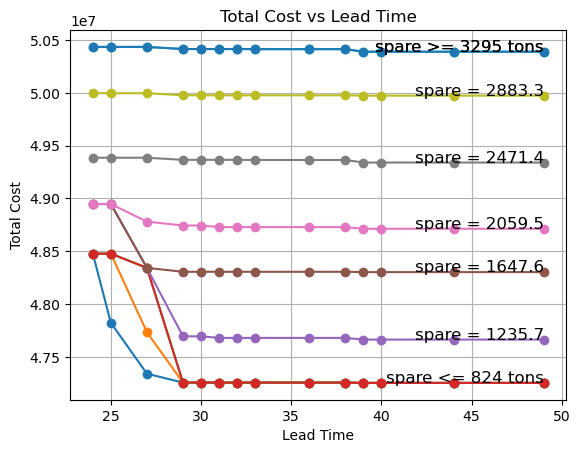

In [35]:
df_sorted_time = df_temp.sort_values(by=['lead_time', 'total_cost'])

fig, ax = plt.subplots()

for tsc in df_temp["spare_quantity"].unique():
    x=df_sorted_time['lead_time'][df_temp["spare_quantity"]==tsc]
    y=df_sorted_time['total_cost'][df_temp["spare_quantity"]==tsc]
    ax.plot(x, y, marker='o')
    
    if len(x)>0:
        if tsc == test_spare_capacity[3]:
            ax.text(x.iloc[-1], y.iloc[-1], f'spare <= 824 tons', fontsize=12, ha='right')
        elif tsc in test_spare_capacity[4:9]:
            ax.text(x.iloc[-1], y.iloc[-1], f'spare = {tsc}', fontsize=12, ha='right')
        elif tsc in test_spare_capacity[9:]:
            ax.text(x.iloc[-1], y.iloc[-1], f'spare >= 3295 tons', fontsize=12, ha='right')
            pass

plt.xlabel('Lead Time')
ax.set_ylabel('Total Cost')
#ax.legend(test_spare_capacity)
plt.title('Total Cost vs Lead Time')
ax.grid(True)

plt.show()



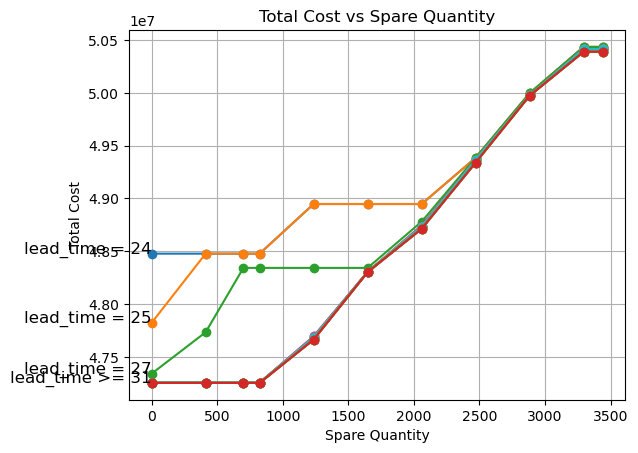

In [36]:
df_sorted_spare = df_temp.sort_values(by=['spare_quantity', 'total_cost'])

fig, ax = plt.subplots()

for tlt in df_temp["lead_time"].unique():
    x=df_sorted_spare['spare_quantity'][df_temp["lead_time"]==tlt]
    y=df_sorted_spare['total_cost'][df_temp["lead_time"]==tlt]
    ax.plot(x, y, marker='o')
    
    if len(x)>0:
        if tlt in [24,25,27]:
            ax.text(x.iloc[0], y.iloc[0], f'lead_time = {tlt}', fontsize=12, ha='right')
        elif tlt==31:
            ax.text(x.iloc[0], y.iloc[0], f'lead_time >= {tlt}', fontsize=12, ha='right')
        else:
            pass

ax.set_xlabel('Spare Quantity')
ax.set_ylabel('Total Cost')
#ax.legend(test_lead_time)
ax.set_title('Total Cost vs Spare Quantity')
ax.grid(True)

plt.show()

In [37]:
df_sorted_spare.head()

,lead_time,spare_quantity,total_cost,fixed costs,total landed_costs,nb operating plant,operating_plants,nb plant to close,plants_to_close,dataframe for details
143,49,0.0,47252536.0,6185400.0,41067136.0,3,"[Country 1, Country 3, Country 6]",3,"[Country 2, Country 4, Country 5]",143
132,44,0.0,47252536.0,6185400.0,41067136.0,3,"[Country 1, Country 3, Country 6]",3,"[Country 2, Country 4, Country 5]",132
121,40,0.0,47252536.0,6185400.0,41067136.0,3,"[Country 1, Country 3, Country 6]",3,"[Country 2, Country 4, Country 5]",121
110,39,0.0,47252536.0,6185400.0,41067136.0,3,"[Country 1, Country 3, Country 6]",3,"[Country 2, Country 4, Country 5]",110
99,38,0.0,47255596.0,6185400.0,41070196.0,3,"[Country 1, Country 3, Country 6]",3,"[Country 2, Country 4, Country 5]",99


In [38]:
df_sorted_spare["spare_quantity"].unique()

array([   0. ,  411.9,  700. ,  823.8, 1235.7, 1647.6, 2059.5, 2471.4,
       2883.3, 3295.2, 3439. ])